In [410]:
# Initialize Otter Grader
import otter
grader = otter.Notebook()

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

___

#### NAME: Haojuan He

#### STUDENT ID: 3033721461
___

# Data-X Fall 2020: Homework 04

### Linear regression and matplotlib.

Author: Ming-Yen Kao.

In this homework, you will do some exercises with regression and plotting. 

## Only submit your jupyter notebook to Gradescope

## Question 1 - Data Pre-processing

Data Source of SP500.csv is Yahoo Finance; Data Source of Gold.csv is Gold.org; Data Source of 30YTBond.csv is Macrotrends.net.
SP500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. The unit of Gold price is USD per oz. 30YTBond stands for US Treasury Bond future price with maturity of 30 years.


1a) Use pandas to load data from .csv to DataFrame. Please load 'SP500.csv' to df_SP500, load 'Gold.csv' to df_Gold, and load '30YTBond.csv' to df_30YTB.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 1
-->

In [5]:
# Load required modules
import numpy as np
import pandas as pd
#!pip install otter-grader
df_SP500 = pd.read_csv('SP500.csv')
df_Gold = pd.read_csv('Gold.csv')
df_30YTB = pd.read_csv('30YTBond.csv')


In [2]:
grader.check("q1a")

NameError: name 'grader' is not defined

1b) Only leave 'Date' and 'US dolloar price' in df_Gold and only leave 'Date' and 'closing price' in df_SP500. In other word 'Open', 'High', 'Low', 'Adj Close', and 'Volume' have to be dropped from df_SP500. 'Euro', 'Pound sterling', and 'Japanese yen' have to be dropped from df_Gold.

<!--
BEGIN QUESTION
name: q1b
manual: false
points: 2
-->

In [6]:
df_SP500 = df_SP500.drop(columns = ['Open','High','Low','Adj Close','Volume'])
df_Gold = df_Gold.drop(columns = ['Euro','Pound sterling','Japanese yen'])
df_30YTB


,Date,value
0,1977/8/22,102.3750
1,1977/8/23,102.7810
2,1977/8/24,102.6560
3,1977/8/25,103.0940
4,1977/8/26,103.0620
...,...,...
10827,2020/9/8,176.2813
10828,2020/9/9,175.7188
10829,2020/9/10,176.2500
10830,2020/9/11,176.5938


In [7]:
grader.check("q1b")

NameError: name 'grader' is not defined

1c) Sample the very first price of the asset in each month to represnet that month. 

For example, 1999/1/2 price of bananan is 90; 1999/1/5 price of bananan is 85; 1999/1/6 price of bananan is 91. You should use 90 to represent the price of 1999/1. Please convert the date to Pandas datetime formate with day always = 1 ex: 1970-02-01 or 2000-11-01. Replace the original data frames of df_SP500, df_Gold, and df_30YTB with the sampled data frames. For example, we have [1999/1/2: 90, 1999/1/5: 85, 1999/1/6: 91, 1999/2/4: 70, 1999/2/7: 89]. After sampling, we should have [1999/1/1: 90, 1999/2/1: 70].

* Remember to keep the Date in the format of Pandas timestamp!

df_30YTB after sampling should be
<img src="./Img6.png">
<!--
BEGIN QUESTION
name: q1c
manual: false
points: 3
-->

In [8]:
from datetime import datetime
#df_SP500.sort_values('Date')
#df_SP500['Month'] = [dt.to_datetime().month() for dt in df_SP500['Date']]
#f_SP500['Date'][0]
df_SP500['index_i'] = np.arange(0,len(df_SP500))
dtobj_500 = [datetime.strptime(dt,'%Y-%m-%d') for dt in df_SP500['Date']]
df_SP500['dtobj'] = dtobj_500
df_SP500.sort_values('dtobj')
#datetime.datetime(tomorrow.year, tomorrow.month, tomorrow.day, 12, 0, 0)
df_SP500['Year_Month'] = [datetime(dt.year,dt.month,1,0,0,0) for dt in df_SP500['dtobj']]
#df_SP500['day'] = [dt.date for dt in df_SP500['dtobj']]
#newdate500 = []
#newusdollarprice500 = []
#for i in np.arange(1,13):
new_SP500 = pd.pivot_table(df_SP500, values=['Close','index_i'], index=['Year_Month'],
                    aggfunc='first')
df_SP500 = new_SP500
df_SP500 = df_SP500.reset_index()
df_SP500 = df_SP500.set_index('index_i')
df_SP500.rename_axis(None)
#df_30YTB.columns = ['Date','value']
df_SP500.columns = ['Date','Close']



#creating the gold table
df_Gold['index_i'] = np.arange(0,len(df_Gold))
dtobj_gold = [datetime.strptime(dt,'%Y/%m/%d') for dt in df_Gold['Date']]
df_Gold['dtobj'] = dtobj_gold
df_Gold.sort_values('dtobj')
df_Gold['Year_Month'] = [datetime(dt.year,dt.month,1,0,0,0) for dt in df_Gold['dtobj']]
new_Gold = pd.pivot_table(df_Gold, values=['US dollar','index_i'], index=['Year_Month'],
                    aggfunc='first')
df_Gold = new_Gold
df_Gold = df_Gold.reset_index()
df_Gold = df_Gold.set_index('index_i')
df_Gold.rename_axis(None)
#df_Gold.columns = ['Date','US dollar']
df_Gold.columns = ['Date','US dollar']


#creating new YBT30
df_30YTB['index_i'] = np.arange(0,len(df_30YTB))
dtobj_YTB = [datetime.strptime(dt,'%Y/%m/%d') for dt in df_30YTB['Date']]
df_30YTB['dtobj'] = dtobj_YTB
df_30YTB.sort_values('dtobj')
df_30YTB['Year_Month'] = [datetime(dt.year,dt.month,1,0,0,0) for dt in df_30YTB['dtobj']]
new_YTB = pd.pivot_table(df_30YTB, values=['value','index_i'], index=['Year_Month'],
                    aggfunc='first')
df_30YTB = new_YTB
df_30YTB = df_30YTB.reset_index()
df_30YTB = df_30YTB.set_index('index_i')
df_30YTB.rename_axis(None)
df_30YTB.columns = ['Date','value']

#df_30YTB
#df_30YTB.columns = ['Date','value']



In [9]:
grader.check("q1c")

NameError: name 'grader' is not defined

## Question 2 - Data Visualization & Linear Regression

In [10]:
import matplotlib.pyplot as plt

2a) Oberve the example plot below and try to reproduce it. y-left is df_SP500['Date'] in linear scale and y-right is df_SP500['Date'] in log scale. 

Specs:
1. x-label and x-scale in black
2. y-left label, y-left scale, and the corresponding line-plot in blue
3. y-right label, y-right scale, and the corresponding line-plot in red
4. plot title is 'Price of the S&P 500 Index'
5. y-left label is 'Price (linear in $ US Dollars)'

6. y-right label is 'Price (log in $ US Dollars)'
7. x label is 'Date'


Some helpful functions: axis.set_xlabel(), axis.set_ylabel(), axis.tick_params(), and axis.twinx()

<img src="./Img1.png">

<!--
BEGIN QUESTION
name: q2a
manual: false
points: 3
-->

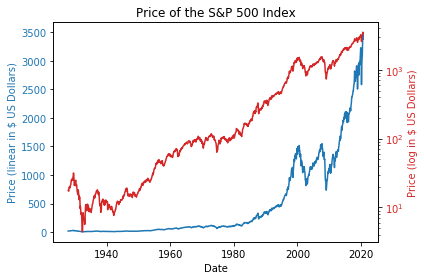

In [28]:
#plt.plot(df_SP500['Date'],df_SP500['Close'],color = 'blue')
#plt.plot(df_SP500['Date'],np.log(df_SP500['Close']),color = 'red')
x_value = df_SP500['Date']
y_left = df_SP500['Close']
y_right = df_SP500['Close']
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (linear in $ US Dollars)', color=color)
ax1.plot(x_value, y_left, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Price (log in $ US Dollars)', color=color)
ax2.plot(x_value, y_right, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yscale('log')

plt.title('Price of the S&P 500 Index')
fig.tight_layout()
plt.show()


In [12]:
grader.check("q2a")

NameError: name 'grader' is not defined

2b) Linear regression of S&P 500 Index. 

1. Convert the 'Date' in df_SP500 to numpy.array and convert the unit to day as 'x' and convert the 'Close' in df_SP500 to numpy.array as 'y'. 
2. Shift the date so that the first element in array 'x' is 0.
3. Follow the linear regression procedure in the slides https://datax.berkeley.edu/wp-content/uploads/2020/09/slides-m100-linear-regression.pdf. Page 9.
4. Calculate the root mean square error and store it in 'error'. 
5. Finally plot the data and the fitting line together as the example plot below. 

Specs of plot:
1. Color in default (please plot the data first so that the color of data will be blue)
2. plot title is 'Price of the S&P 500 Index'
3. x-label is 'Date'
4. y-label is 'Price (in $ US Dollars)'

<img src="./Img2.png">

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 3
-->

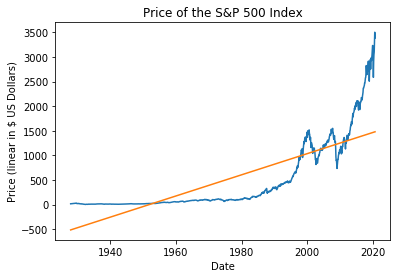

Root Mean Square Error:  434.79997247592337


In [13]:
try1 = df_SP500['Date'].copy()
initial = try1[0]
shift = [i-initial for i in try1]
shifted = pd.Series(shift)
shifted = shifted.astype(int)
unit_shift = [int(i/(86400000000000)) for i in shifted]
x = np.asarray(unit_shift)
y = np.asarray(df_SP500['Close'])
E_x = np.mean(x)
E_y = np.mean(y)
cov_xy = np.mean(x*y) - E_x*E_y
y_0 = E_y - cov_xy/np.var(x)*E_x
m = cov_xy/np.var(x)
y_pred = m*x + y_0
error = np.sqrt(np.mean(np.square(y_pred - y)))
m,b = np.polyfit(x,y_pred,1)
plt.plot(df_SP500['Date'],y_left)
plt.plot(df_SP500['Date'], m*x + b)
plt.title('Price of the S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Price (linear in $ US Dollars)')
plt.show()


#df_SP500['Date']
#shifted

print ('Root Mean Square Error: ', error )

In [14]:
grader.check("q2b")

NameError: name 'grader' is not defined

2c) Exponential regression of S&P 500 Index. 
1. Do the same thing as in 2b, but try to use exponential to fit the data this time. 
2. Convert the 'Date' in df_SP500 to numpy.array and convert the unit to day as 'x' and convert the 'Close' in df_SP500 to numpy.array as 'y'. 
3. Shift the date so that the first element in array 'x' is 0.
4. Use exponential function to fit the data. Calculate the root mean square error and store it in 'error'. 
5. Finally plot the data and the fitting line  together as the example below.

Hint: apply log to y value so that you can process the data as linear regression in 2(b). Remember to convert it back for the calculation for the 'error' and for the plot.


Specs of plot:
1. Color in default (please plot the data first so that the color of data will be blue)
2. plot title is 'Price of the S&P 500 Index'
3. x-label is 'Date'
4. y-label is 'Price (in $ US Dollars)'

<img src="./Img3.png">

<!--
BEGIN QUESTION
name: q2c
manual: false
points: 3
-->

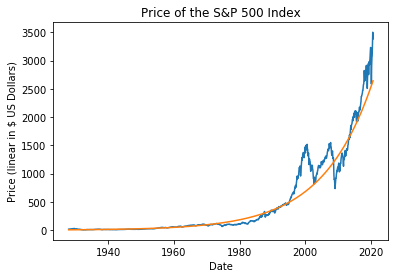

Root Mean Square Error:  184.58637172480604


In [18]:
exp_y = np.log(y)
E_x = np.mean(x)
E_expy = np.mean(exp_y)
cov_xy_ep = np.mean(x*exp_y) - E_x*E_expy
y_0_ep = E_expy - cov_xy_ep/np.var(x)*E_x
m = cov_xy_ep/np.var(x)
y_pred_ep = m*x + y_0_ep
error = np.sqrt(np.mean(np.square((np.exp(y_pred_ep)) - y)))
m,b = np.polyfit(x,np.exp(y_pred_ep),1)
plt.plot(df_SP500['Date'],y_left)
plt.plot(df_SP500['Date'], np.exp(y_pred_ep))
plt.title('Price of the S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Price (linear in $ US Dollars)')
plt.show()

print ('Root Mean Square Error: ',  error)

In [19]:
grader.check("q2c")

NameError: name 'grader' is not defined

2d) Scatter plot of month-to-month return of S&P 500 Index and 30 Year Treasury Bond.
1. Compute the month-to-month returns on S&P 500 and 30 Year Treasury Bond between 1977-08-01 (inclusive) and 2019-12-31 (inclusive). The month-to-month returns should be in the net-increment. For example, price on 2014-1-1 is 100 and price on 2014-2-1 is 105. The month-to-month return from 2014-1-1 to 2014-2-1 should be 0.05. Another example, if the array of the price of S&P 500 is [100, 105, 100, 105], the month-to-month return array should be [0.05, -0.04761904762, 0.05].
2. Save the month-to-month returns in the format of numpy arrary in ‘x3’ and ‘y3’, respectively. Note that if the dimension of the array of price is n, the dimension of month-to-month return array should be n-1.
3. Finally plot ‘x3’ and ‘y3’ as scatter plot. Try to reproduce the plot below.


Specs of plot:
1. Color in default
2. plot title is 'Scatter Plot of the Returns'
3. x-label is 'Month-to-month return of the S&P 500 Index'
4. y-label is 'Month-to-month return of the 30-Year T-bond'

<img src="./Img4.png">

<!--
BEGIN QUESTION
name: q2d
manual: false
points: 2
-->

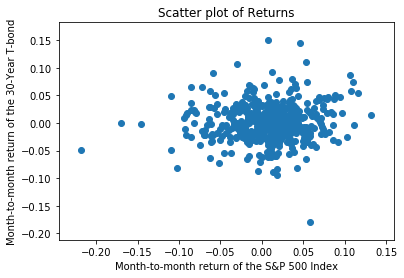

[-2.48008688e-03 -4.34062265e-02  2.69656282e-02  2.84715801e-03
 -6.15141758e-02 -2.47618936e-02  2.49310429e-02  8.54164677e-02
  4.23418353e-03 -1.75853459e-02  5.39097776e-02  2.59237286e-02
 -7.26110943e-03 -9.15740092e-02  1.66397742e-02  1.48891663e-02
  3.97461134e-02 -3.65255779e-02  5.51516105e-02  1.67345218e-03
 -2.63364775e-02  3.86556512e-02  8.74544714e-03  5.30777585e-02
  0.00000000e+00 -6.86059276e-02  4.26242781e-02  1.67671245e-02
  5.76246237e-02 -4.37981765e-03 -1.01794893e-01  4.11402210e-02
  4.65706741e-02  2.69687168e-02  6.50385165e-02  5.83544844e-03
  2.51675280e-02  1.60210586e-02  1.02377053e-01 -3.38742447e-02
 -4.57424295e-02  1.32767345e-02  3.60325730e-02 -2.34558971e-02
 -1.65651685e-03 -1.04079421e-02 -2.21026587e-03 -6.20989698e-02
 -5.38317530e-02  4.91478654e-02  3.65903605e-02 -3.00751489e-02
 -1.75438674e-02 -6.05481801e-02 -1.01671116e-02  4.00143180e-02
 -3.91618423e-02 -2.02895608e-02 -2.29906485e-02  1.15977276e-01
  7.61439197e-03  1.10446

In [20]:
from datetime import date
smaller = df_SP500[df_SP500['Date'] < pd.Timestamp(date(2020,1,1))]
smaller1 = df_30YTB[df_30YTB['Date'] < pd.Timestamp(date(2020,1,1))]
new_sp500 = smaller[smaller['Date'] > pd.Timestamp(date(1977,7,30))]
new_30YTB = smaller1[smaller1['Date'] > pd.Timestamp(date(1977,7,30))]
sp500_value = new_sp500['Close'].tolist()
ytb30_value = new_30YTB['value'].tolist()
x3 = np.asarray([(sp500_value[i+1] -sp500_value[i])/sp500_value[i] for i in np.arange(len(sp500_value) - 1)])
y3 = np.asarray([(ytb30_value[i+1] -ytb30_value[i])/ytb30_value[i] for i in np.arange(len(ytb30_value) - 1)])
plt.scatter(x3, y3)
plt.title('Scatter plot of Returns')
plt.xlabel('Month-to-month return of the S&P 500 Index')
plt.ylabel('Month-to-month return of the 30-Year T-bond')
plt.show()

print (x3, y3)

In [21]:
grader.check("q2d")

NameError: name 'grader' is not defined

2e) Plot the histogram of S&P 500 month-to-month returns. The y-axis is count, and the x-axis is month-to-month return. The number of the bars should be 100. Try to reproduce the plot below.


Specs of plot:
1. Color in default
2. plot title is 'Histogram of S&P 500'
3. x-label is 'Month-to-Month Return'
4. y-label is 'Count'
5. number of the bars should be 100.

<img src="./Img5.png">

<!--
BEGIN QUESTION
name: q2e
manual: false
points: 1
-->

Text(0, 0.5, 'Count')

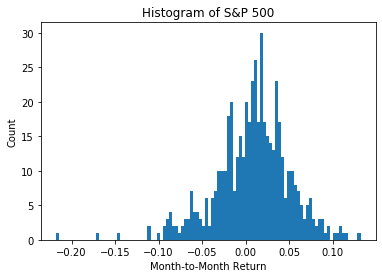

In [22]:
plt.hist(x3, bins = 100)
plt.title('Histogram of S&P 500')
plt.xlabel('Month-to-Month Return')
plt.ylabel('Count')

In [430]:
grader.check("q2e")

All tests passed!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [409]:
# Save your notebook first, then run this cell to create a pdf for your reference.